# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, fixed

%matplotlib inline

#Perceptron

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o Perceptron. Inicialmente, o Perceptron foi projetado para ser um classificador binário linear responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de regressão linear. Ele foi projetado em 1957 por Frank Rosenblatt.

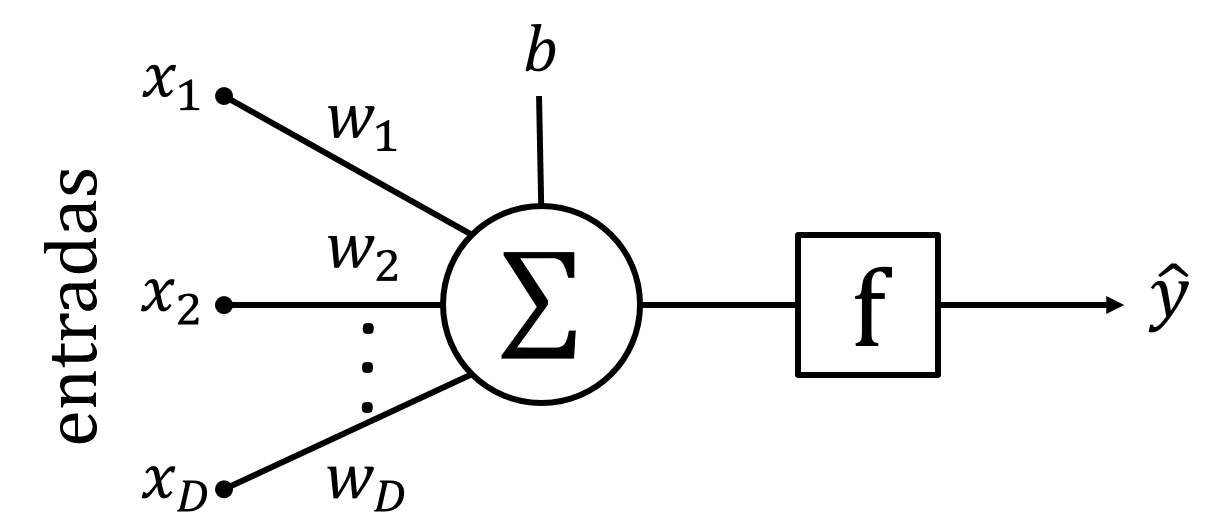

In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

##Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1
learning_rate = 1e-2

for step in range(0, 100):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
    y_pred = 1 if y_pred > 0 else 0
    error = y_n - y_pred
    w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
    b = b + learning_rate*error

    cost += error**2

  if step % 10 == 0:
    print('Step {0}: {1}'.format(step, cost))

  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print("Custo zero, finalizando algoritmo")
    break

print('Pesos: {0}'.format(w))
print('Bias: {0}'.format(b))
print('Predicao: {0}'.format(np.dot(x, np.array(w))+b))
plot_linear_classifier(x, y, w, b)

## Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1
learning_rate = 1e-2

for step in range(0, 100):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = np.dot(x_n, w) + b
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y_n - y_pred
    w = w + learning_rate*np.dot(error, x_n)
    b = b + learning_rate*error
    cost += error**2
  if step % 10 == 0:
      print('Step {0}: {1}'.format(step, cost))

  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print("Custo zero, finalizando algoritmo")
    break
print('Pesos: {0}'.format(w))
print('Bias: {0}'.format(b))
print('Predicao: {0}'.format(np.dot(x, np.array(w))+b))
plot_linear_classifier(x, y, w, b)

## Exercicios

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')


### Resolução

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1
learning_rate = 1e-2

for step in range(0, 100):
  cost = 0
  for x_n, y_n in zip(x, y):
      y_pred = np.dot(x_n, w) + b
      y_pred = np.where(y_pred > 0, 1, 0)
      error = y_n - y_pred
      w = w + learning_rate*np.dot(error, x_n)
      b = b + learning_rate*error
      cost += error**2
  if step % 10 == 0:
      print('Step {0}: {1}'.format(step, cost))

  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print("Custo zero, finalizando algoritmo")
    break
print('Pesos: {0}'.format(w))
print('Bias: {0}'.format(b))
print('Predicao: {0}'.format(np.dot(x, np.array(w))+b))
plot_linear_classifier(x, y, w, b)

### Regressão Linear

In [ ]:
df = pd.read_csv('/content/medidas.csv')
print(df.shape)
df.head(10)

In [ ]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
print(x.shape, y.shape)

In [ ]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

### Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + 1.0*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1.0*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)


### Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + 1.0*np.dot(error, x_n)
        b = b + 1.0*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)


### Numpy com Pré-Processamento

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2

    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)


In [ ]:
df = pd.read_csv('/content/notas.csv')

print(df.shape)
df.head(10)

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [ ]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

In [ ]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

print('W: ' , reg.coef_)
print('B: ' , reg.intercept_)

## Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2

for step in range(2001):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
    error = y_n - y_pred
    w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
    b = b + learning_rate*error
    cost += error**2

  if step%200 == 0:
    print('Step {0}: {1}'.format(step, cost))

  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print('Custo zerado')
    break

print('w: ', w)
print('b: ', b)


##Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1


learning_rate = 1e-2

for step in range(2001):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = np.dot(x_n, w) + b
    error = y_n - y_pred
    w = w + learning_rate*np.dot(error, x_n)
    b = b + learning_rate * error
    cost += error**2
  if step%200 == 0:
    print('Step {0}: {1}'.format(step, cost))
  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print('Custo zerado')
    break



print('w: ', w)
print('b: ', b)


#Adaline

A Rede Neural Adaline (Adaptive Linear Neuron) é um modelo simples de aprendizado de máquina que foi proposto como uma extensão do Perceptron. Foi desenvolvida por Bernard Widrow e Ted Hoff em 1960.

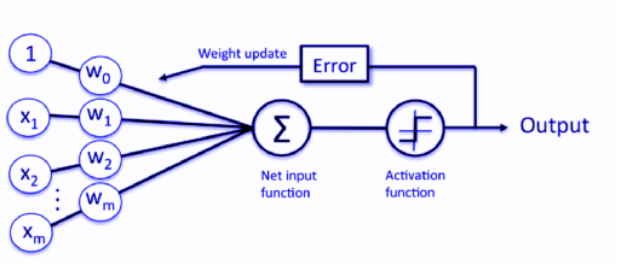

In [ ]:
D = x.shape[1]
w = [2*random() -1 for i in range(D)]
b = 2*random() - 1

learning_rete = 1e-2

for step in range(2000):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b

    error = y_n - y_pred
    w = [w_i +  learning_rate * error * x_i for x_i, w_i in zip(x_n, w)]
    b = b + learning_rate * error
    cost += error**2

  if step%200 == 0:
    print('Step {0}: {1}'.format(step, cost))
  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print('Custo zerado')
    break

print('W: ', w)
print('B: ', b)


In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

## Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = (2*random())-1

learning_rate = 1e-1

for step in range(2000):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)])+b
    error = y_n - y_pred

    w = [w_i + learning_rate*error*x_i for x_i, w_i in zip (x_n, w)]
    b = b + learning_rate * error

    cost += error**2
  if step%200 == 0:
    print('Step {0}: {1}'.format(step, cost))
  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print('Erro zerado')
    break

print('W: ', w)
print('B: ', b)
plot_linear_classifier(x, y, w, b)

## Classificação

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = (2*random())-1

learning_rate = 1e-3

for step in range(1001):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)])+b
    y_pred = sigmoid(y_pred) # Função de ativação
    error = y_n - y_pred
    w = [w_i + learning_rate*error*x_i for x_i, w_i in zip (x_n, w)]
    b = b + learning_rate * error

    cost += error**2
  if step%100 == 0:
    print('Step {0}: {1}'.format(step, cost))
  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print('Erro zerado')
    break

print('W: ', w)
print('B: ', b)
plot_linear_classifier(x, y, w, b)

#Neurônio Sigmoid


O neurônio sigmoid, ou neurônio de ativação sigmoid, é um tipo de neurônio artificial com uma função de ativação conhecida como função sigmoid. A função sigmoid é uma função matemática que mapeia qualquer valor real para o intervalo entre 0 e 1. Essa função é frequentemente utilizada para introduzir não-linearidade em modelos de redes neurais, tornando-os capazes de aprender e lidar com relações complexas nos dados.

Os neurônios sigmoid eram comuns em camadas ocultas de redes neurais profundas, mas atualmente a função de ativação sigmoid é menos utilizada em camadas ocultas devido a problemas como o desaparecimento do gradiente. Em muitos casos, funções de ativação como ReLU (Rectified Linear Unit) são preferidas devido ao seu comportamento mais eficaz em termos de treinamento.

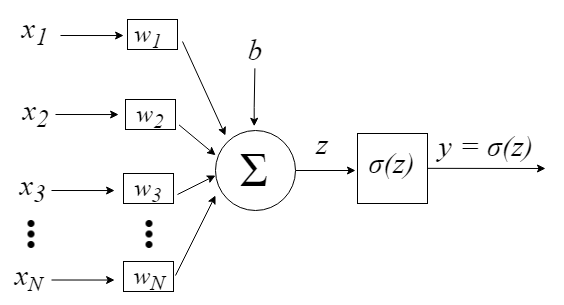

In [ ]:
import numpy as np

def cross_entropy(y, y_pred):
    return np.mean(-y * np.log(y_pred) - (1-y)*np.log(1-y_pred))

result = cross_entropy(np.array([0.0, 1.0, 0.0, 1.0]), np.array([0.0, 1.0, 0.0, 1.0]))


In [ ]:
def sigmoid (x):
	return 1.0/ (1.0 + np.exp(-x))

In [ ]:
D = x.shape[1]
w = 2*np.random.random((1, D)) - 1 # [1x1]
b = 2*np.random.random() - 1

learning_rate = 1.0

for step in range(1):
	z = np.dot(x, w.T) + b
	y_pred = sigmoid(z)
	error = y - y_pred
	w = w + learning_rate*np.dot(error.T, x)
  b = b + learning_rate * np.sum(error)

  if step % 100 == 0:
		cost = (y, y_pred)
    print('Step {0}: {1}'.format(step, cost))

print('W: {0}'.format(w))
print('B: {0}'.format(b))

#Funções de Ativação - Redes Neurais

As funções de ativação são componentes essenciais nas redes neurais artificiais, especialmente em camadas ocultas e na camada de saída. Elas são aplicadas a cada neurônio e determinam se ele deve ser ativado ou não, ou seja, se deve transmitir um sinal para a próxima camada da rede.

In [ ]:
def plot_interactive(w, b, func, ylim=fixed((0, 1)), show_der=False):
    plt.figure(0)

    x = np.linspace(-10, 10, num=1000)
    z = wx + b
    y = func(z)

    plt.plot(x, y, color='blue')
    if show_der:
        der = func(z, derivative=True)
        y_der_z = der
        y_der_x = wder
        plt.plot(x, y_der_z, color='red')
        plt.plot(x, y_der_x, color='green')
    plt.xlim(-10, 10)
    plt.ylim(ylim[0], ylim[1])
    plt.show()

##Função de Ativação Linear

A função de ativação linear é uma função simples que produz uma saída proporcional à entrada. Em outras palavras, a saída é igual à entrada multiplicada por um fator constante.

Esta função é linear e possui uma complexidade muito baixa, já que não há transformação não linear aplicada à entrada. Ela é simplesmente uma operação de escala. Como resultado, a função de ativação linear é mais comumente usada em modelos de regressão linear, onde a relação entre as variáveis de entrada e saída é considerada linear.

No entanto, em problemas mais complexos e não lineares, como classificação ou tarefas de regressão mais complexas, a função de ativação linear não é adequada. Isso ocorre porque ela não pode capturar as relações complexas entre os recursos de entrada e a saída desejada.

\begin{align}
        y = x
    \end{align}

Derivada
\begin{align}
        y' = 1
    \end{align}

In [ ]:
def  linear(x, derivative=False):
    return np.ones.like(x) if derivative else x


##Função de Ativação Sigmoid

A função de ativação sigmoid, também conhecida como função logística, é uma função matemática que tem a forma de uma curva S. Ela mapeia qualquer valor real para o intervalo entre 0 e 1.

A função sigmoid é comumente usada em redes neurais para problemas de classificação binária, onde o objetivo é prever uma saída binária, como sim ou não, 0 ou 1. Ela é especialmente útil quando você deseja calcular a probabilidade de uma determinada classe.



No entanto, a função sigmoid tem algumas limitações. Uma delas é que ela satura quando os valores de entrada são muito grandes ou muito pequenos, o que pode levar a problemas de aprendizado conhecidos como "vanishing gradients" (gradientes que desaparecem). Isso significa que a função sigmoid pode ter dificuldade em lidar com gradientes muito pequenos durante o treinamento da rede neural, especialmente em arquiteturas mais profundas.

Além disso, a função sigmoid não é simétrica em relação à origem, o que pode causar problemas de deslocamento de bias (bias shift) durante o treinamento.

Devido a essas limitações, a função sigmoid não é tão amplamente utilizada quanto antes em camadas ocultas de redes neurais.

\begin{align}
        σ(x) = \frac{1\,}{1 + e^{-x}}
    \end{align}


Derivada
\begin{align}
        y' = y(1-y)
    \end{align}

In [ ]:
def sigmoid(x, derivative=False):
  if derivative:
    y = sigmoid(x)
    return y * (1-y)
  return 1.0/(1.0 + np.exp(-x))

##Função de Ativação Tanh

A função de ativação Tanh, ou tangente hiperbólica, é uma função não linear que mapeia os valores de entrada para o intervalo [-1, 1].

A função Tanh é frequentemente usada em redes neurais para resolver uma variedade de problemas de aprendizado de máquina, incluindo classificação e regressão. Ela é uma opção popular como função de ativação em camadas ocultas de redes neurais devido à sua capacidade de lidar com gradientes explosivos e ajudar na convergência do modelo durante o treinamento.

Comparada à função sigmoid, a função Tanh oferece uma melhor simetria em torno da origem, o que pode ajudar a lidar com problemas de centro zero. No entanto, ela ainda pode sofrer do problema de desaparecimento de gradientes em redes neurais profundas.

Em termos de complexidade, a função Tanh é semelhante à função sigmoid, mas com saída no intervalo [-1, 1], o que a torna mais apropriada para problemas que requerem normalização de saída.

\begin{align}
        y = \frac{e^{x} -\, e^{-x}}{e^{x} + e^{-x}}
    \end{align}

Derivada
\begin{align}
        y' = 1 - y^{2}
    \end{align}

In [ ]:
def tanh(x, derivative=False):
  if derivative:
    y = tanh(x)
    return 1 - y**2
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

##Função de Ativação ReLU

A função de ativação ReLU (Rectified Linear Unit) é uma função não linear que mapeia os valores de entrada para o intervalo [0, +∞).

A função ReLU é amplamente utilizada em redes neurais devido à sua simplicidade e eficácia. Ela é aplicada elemento a elemento e substitui todos os valores negativos por zero, mantendo os valores positivos inalterados.

A função ReLU resolve o problema de gradientes desaparecendo durante o treinamento, comum em funções de ativação como sigmoid e tanh, pois mantém a propagação do gradiente para valores positivos. Além disso, a função ReLU é computacionalmente eficiente, pois é fácil de calcular e não possui operações exponenciais.

A função ReLU é frequentemente usada em redes neurais convolucionais (CNNs) e em redes neurais profundas devido à sua capacidade de acelerar o treinamento e lidar efetivamente com problemas de vanishing gradient. Ela é especialmente adequada para problemas de classificação e reconhecimento de padrões.

\begin{align}
 y = max(0,x)
\end{align}


Derivada
\begin{align}
\frac {\alpha y}{\alpha x} =
  \left\{
  \begin{array}{cl}
  0, x \leqslant 0 \\
  1, x > 0
  \end{array}
  \right.
\end{align}


In [ ]:
def relu(x, derivative=False):
  if derivative:
    return np.where(x <= 0, 0, 1)
  return np.maximum(0, x)

##Função de Ativação Leaky ReLU
A função de ativação Leaky ReLU é uma variação da função ReLU (Rectified Linear Unit). Enquanto a função ReLU define todos os valores negativos como zero, a função Leaky ReLU permite que uma pequena inclinação seja aplicada aos valores negativos, em vez de zerá-los completamente.

A função Leaky ReLU mantém a propagação do gradiente mesmo para valores negativos pequenos, o que ajuda a mitigar o problema do "dying ReLU", no qual alguns neurônios na rede podem se tornar inativos e não aprender durante o treinamento. Isso pode ser especialmente útil em redes neurais profundas com muitas camadas, onde o problema do desaparecimento do gradiente pode ser mais pronunciado.

A função Leaky ReLU é frequentemente usada em redes neurais profundas como uma alternativa à função ReLU, especialmente em casos onde a função ReLU pode resultar em neurônios mortos. Ela pode ser aplicada em uma variedade de problemas de aprendizado de máquina, incluindo classificação, regressão e tarefas de processamento de imagens e de áudio.

\begin{align}
  \left\{
  \begin{array}{cl}
  \alpha x, x \leqslant 0 \\
  x, x > 0
  \end{array}
  \right.
\end{align}

Onde α é um hiperparâmetro pequeno que controla a inclinação dos valores negativos.


Derivada
\begin{align}
\frac {\alpha y}{\alpha x} =
  \left\{
  \begin{array}{cl}
  \alpha, x \leqslant 0 \\
  1, x > 0
  \end{array}
  \right.
\end{align}

In [ ]:
def leaky_relu(x, derivative=False):
  alpha = 0.1
  if derivative:
    return np.where(x <= 0, alpha, 1)
  return np.where(x <= 0, alpha*x, x)

##Função de Ativação eLU



\begin{align}
  eLU(x) = \left\{
  \begin{array}{cl}
  x, x > 0 \\
  \alpha * ({e ^{x} - 1}), x \leqslant 0
  \end{array}
  \right.
\end{align}

Onde α é um hiperparâmetro que define o valor negativo para o qual a função começa a saturar negativamente.

Derivada
\begin{align}
\frac {\alpha y}{\alpha x} =
  \left\{
  \begin{array}{cl}
  y + \alpha, x \leqslant 0 \\
  1, x > 0
  \end{array}
  \right.
\end{align}

In [ ]:
def elu(x, derivative=False):
  alpha = 0.1
  if derivative:
    return np.where(x <= 0, y + alpha, 1)
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))

##Função de Ativação Softmax

A função de ativação softmax é comumente utilizada em problemas de classificação multiclasse, onde o objetivo é atribuir uma ou mais classes a uma entrada. Ela é especialmente adequada para problemas onde cada instância de entrada pode pertencer a uma ou mais classes mutuamente exclusivas.

A função de ativação softmax é computacionalmente complexa, pois envolve o cálculo exponencial e a soma de todas as pontuações exponenciais. No entanto, ela fornece uma interpretação probabilística clara, atribuindo uma probabilidade para cada classe.

Em termos de poder de aprendizado, a função de ativação softmax é altamente expressiva e pode modelar distribuições de probabilidade complexas sobre as classes. Ela é frequentemente usada em conjunto com a função de perda de entropia cruzada (cross-entropy loss) para treinar modelos de classificação multiclasse.

\begin{align}
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
\end{align}



In [ ]:
def softmax(x, y_oh=None, derivative=False):
    if derivative:
      y_pred = softmax(x)
      k = np.nonzero(y_pred * y_oh)
      pk = y_pred[k]
      y_pred[k] = pk * (1.0 - pk)
      return y_pred

    exp = np.exp(x)

    return exp / np.sum(exp, axis=1, keepdims=True)

# Regularização

A regularização em redes neurais é uma técnica usada para evitar o overfitting, que ocorre quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados. A regularização adiciona uma penalidade à função de custo do modelo, incentivando-o a preferir soluções mais simples e suaves. Isso é feito adicionando termos de penalidade aos pesos do modelo durante o treinamento, como na regularização L1 e L2. Outras técnicas de regularização incluem dropout, que aleatoriamente desativa unidades durante o treinamento, e data augmentation, que gera novos exemplos de treinamento a partir dos dados existentes. Essas técnicas ajudam a controlar a complexidade do modelo e melhoram sua capacidade de generalização.

## Overfitting


Overfitting é um problema comum em modelos de machine learning, no qual o modelo aprende a partir dos dados de treinamento tão bem que começa a capturar o ruído e as peculiaridades específicas desses dados, em vez de aprender os padrões gerais que podem ser generalizados para novos dados. Isso resulta em um modelo que se ajusta muito bem aos dados de treinamento, mas não consegue generalizar bem para dados não vistos, levando a uma performance inferior em conjuntos de validação ou teste.

## Regularização L1

A regularização L1, também conhecida como regularização de Lasso, é uma técnica de regularização que adiciona uma penalidade aos coeficientes do modelo proporcional à soma dos valores absolutos desses coeficientes. Isso significa que a função de custo original é aumentada adicionando a soma dos valores absolutos dos coeficientes multiplicados por um parâmetro de regularização (alfa). A regularização L1 é útil para induzir sparsidade nos coeficientes do modelo, ou seja, para fazer com que alguns coeficientes sejam exatamente zero. Isso pode facilitar a interpretação do modelo, reduzir a complexidade e ajudar a evitar o overfitting.


In [16]:
def l1_regularization(weights, derivative=False):
  if derivative:
    weights = ([np.where( w < 0, -1, w) for w in weights])
    return np.array([np.where(w > 0, 1, w) for w in weights])
  return np.sum([(np.sum(np.abs(w))) for w in weights])

## Regularização L2

A regularização L2, também conhecida como regularização de Ridge, é uma técnica de regularização que adiciona uma penalidade aos coeficientes do modelo proporcional à soma dos quadrados desses coeficientes. A função de custo original é aumentada adicionando a soma dos quadrados dos coeficientes multiplicados por um parâmetro de regularização (alfa). A regularização L2 é útil para prevenir overfitting, suavizando os coeficientes do modelo e reduzindo sua sensibilidade aos dados de treinamento. Isso pode levar a uma melhor generalização do modelo e a uma redução no risco de overfitting.

In [17]:
def l2_regularization(weights, derivative=False):
  if derivative:
    return weights
  return 0.5 * np.sum(weights**2)

## Batch Generator

A ideia por trás do Batch Generator é otimizar o processo de treinamento, permitindo que a rede neural seja atualizada com dados em lotes, em vez de processar todos os dados de uma vez. Isso é especialmente útil quando lidamos com grandes conjuntos de dados, onde seria ineficiente e talvez impossível carregar todos os dados na memória ao mesmo tempo.

In [18]:
def batch_sequential(x, y, batch_size=None):
	batch_size = x.shape[0] if batch_size is None else batch_size
	n_batches = x.shape[0] // batch_size

	for batch in range(n_batches):
		offset = batch_size * batch
		x_batch, y_batch = x[offset:offset+batch_size], y[offset:offset+batch_size]
		yield (x_batch, y_batch)

def batch_suffle(x, y, batch_size=None):
    suffle_index = np.random.permutation(range(x.shape[0]))
    return batch_sequential(x[suffle_index], y[suffle_index], batch_size)

## Dropout

O Dropout é uma técnica de regularização que combate o overfitting desligando aleatoriamente uma fração dos neurônios de uma camada durante o treinamento. Durante o treinamento, cada neurônio em uma camada de Dropout é mantido ativo com uma probabilidade
p (chamada de taxa de dropout) e desligado com uma probabilidade 1−p. Isso força a rede neural a aprender representações mais robustas e generalizáveis, pois os neurônios precisam aprender a operar de forma independente e a compensar a ausência temporária de outros neurônios. O Dropout é aplicado apenas durante o treinamento e não durante a inferência, quando todos os neurônios estão ativos. A taxa de dropout é um hiperparâmetro que precisa ser ajustado durante o treinamento da rede neural, e valores típicos para
p estão na faixa de 0,2 a 0,5.



## Batch Normalization

Batch Normalization é uma técnica de regularização usada em redes neurais profundas para normalizar as ativações de uma camada, tornando-as mais estáveis durante o treinamento. Isso é feito normalizando as ativações de cada minibatch, subtraindo a média e dividindo pelo desvio padrão. Isso ajuda a reduzir problemas como o desvanecimento do gradiente e acelera o treinamento, permitindo o uso de taxas de aprendizado mais altas. Além disso, o Batch Normalization também atua como uma regularização, reduzindo a necessidade de outras técnicas de regularização, como Dropout. No entanto, o Batch Normalization pode introduzir uma dependência na ordem dos exemplos de treinamento, o que pode não ser desejável em todos os casos.

In [29]:
def batchnorm_forward(layer, x, is_training=True):
    mu = np.mean(x, axis=0) if is_training else layer._pop_mean
    var = np.var(x, axis=0) if is_training else layer._pop_var
    x_norm = (x - mu) / np.sqrt(var + 1e-8)
    out = layer.gamma * x_norm + layer.beta

    if is_training:
      layer._pop_mean = layer.bn_decay * layer._pop_mean + (1.0  - layer.bn_decay) * mu
      layer._pop_mean = layer.bn_decay * layer._pop_var + (1.0  - layer.bn_decay) * var
      layer._bn_cache = (x, x_norm, mu, var)

    return out

def batchnorm_backward(layer, dactivation):
    x, x_norm, mu, var = layer._bn_cache

    m = layer._activ_inp.shape[0]
    x_mu = x - mu

    std_inv = 1.0 / np.sqrt(var + 1e-8)

    dx_norm = dactivation * layer.gamma

    dvar = np.sum(dx_norm * x_mu, axis=0) * -0.5 * (std_inv**3)

    dmu = np.sum(dx_norm * -std_inv, axis=0) + dvar * np.mean(-2.0 * x_mu, axis=0)

    dx = (dx_norm  * std_inv) + (dvar * 2.0 * x_mu / m) + (dmu / m)

    layer._dgamma = np.sum(dactivation * x_norm, axis=0)

    layer._dbeta = np.sum(dactivation, axis = 0)

    return dx


## Early Stoping

Early Stopping é uma técnica usada para evitar o overfitting durante o treinamento de modelos de aprendizado de máquina. Consiste em interromper o treinamento do modelo assim que a performance do modelo começar a piorar no conjunto de validação. Isso é feito monitorando a performance do modelo em um conjunto de validação separado durante o treinamento e comparando-a com a performance anterior. Quando a performance no conjunto de validação começa a piorar consistentemente por um certo número de épocas (ou iterações), o treinamento é interrompido. Isso ajuda a garantir que o modelo não se ajuste demais aos dados de treinamento e generalize melhor para dados não vistos.


## Momentum

Momentum é uma técnica de otimização usada para acelerar o treinamento de redes neurais, especialmente em casos onde o gradiente é escasso ou ruidoso. Funciona adicionando uma fração do gradiente anterior ao gradiente atual durante a atualização dos pesos do modelo. Isso ajuda a suavizar as oscilações na direção do gradiente e permite que o modelo avance mais rapidamente na direção correta. O momentum também ajuda a escapar de mínimos locais e superfícies de perda estreitas, permitindo que o modelo explore mais eficientemente o espaço de parâmetros. Valores típicos para o momentum estão na faixa de 0,9 a 0,99.

#Backpropagation

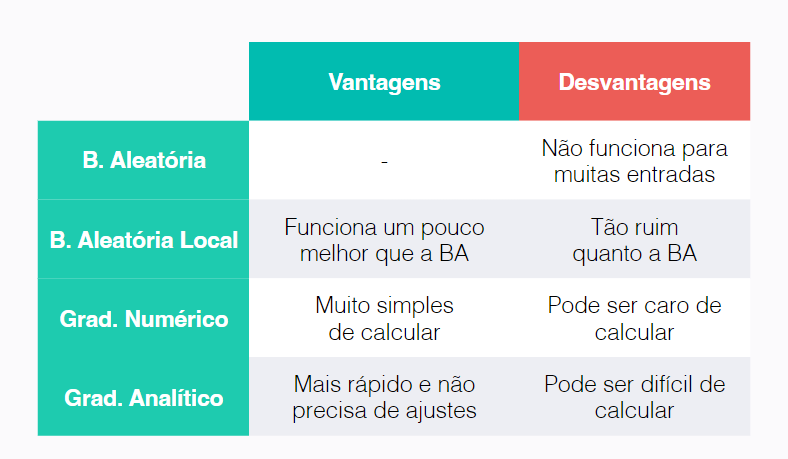

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def forwardMultiplyGate(a, b):
  return a*b

##Busca Aleatória

A estratégia de busca aleatória no contexto do backpropagation é uma abordagem utilizada para ajustar os pesos da rede neural durante o treinamento. Normalmente, durante o treinamento de uma rede neural por backpropagation, os pesos são atualizados iterativamente usando métodos de otimização, com o gradiente descendente.

Na busca aleatória em vez de calcular a direção exata na qual os pesos devem ser ajustados usando derivadas, os ajustes são feitos aleatoriamente dentro de um intervalo específico. Isso pode ser útil para explorar diferentes regiões do espaço de parâmetros da rede neural, especialmente em problemas onde a paisagem de otimização é complexa e pode haver muitos mínimos locais.

In [ ]:
x, y = -2, 3

melhor_saida = forwardMultiplyGate(x, y)

melhor_x, melhor_y = 0, 0

for k in range(0, 100):
  x_try = 5*np.random.random() - 5
  y_try = 5*np.random.random() - 5

  out = forwardMultiplyGate(x_try, y_try)

  if out > melhor_saida:
    melhor_saida = out
    melhor_x, melhor_y = x_try, y_try

print(melhor_x, melhor_y, forwardMultiplyGate(melhor_x, melhor_y))

-4.807210252867228 -4.384842292634578 21.078858826358786


##Busca Aleatória Local

A busca aleatória local no contexto do backpropagation refere-se a uma estratégia de otimização que envolve explorar o espaço de parâmetros de uma rede neural ajustando os epsos de forma aleatória em torno de um ponto específico. Em contrato com a busca aleatória global, que pode explorar aleatoriamente todo o espaço de parâmetros, a busca aleatória local concentra-se em torno de uma região específica do espaço de parâmetros.

Na busca aleatória local, os autes dos pesos são feitos aleatoriamente em torno dos valores atuais dos pesos, geralmente seguindo uma distribuição de probabilidade específica, como uma distribuição normal. Essa abordagem eprmite explorar das regiões próximas ao ponto atual no espaço de parâmetros.

In [ ]:
x, y = -2, 3
passo = 0.01
melhor_saida = forwardMultiplyGate(x, y)
melhor_x, melhor_y = 0, 0

for k in range(0, 100):
  x_try = x + passo * (2*np.random.random() - 1)
  y_try = y + passo * (2*np.random.random() - 1)
  out = forwardMultiplyGate(x_try, y_try)

  if out > melhor_saida:
    melhor_saida = out
    melhor_x, melhor_y = x_try, y_try
print(melhor_x, melhor_y, forwardMultiplyGate(melhor_x, melhor_y))

-1.9911560275822375 2.990184664577222 -5.953924218456907


##Gradiente Numérico

A busca de gradiente numérico em redes neurais é uma técnica de otimização usada para ajustar os parâmetros do modelo com base em estimativas numéricas das derivadas parciais da função de custo em relação a esses parâmetros. Essa abordagem é uma forma alternativa de calcular o gradiente da função de custo em relação aos parâmetros do modelo quando não é possível ou prático calcular analiticamente essas derivadas.

Na busca de gradiente numérico, as derivadas parciais da função de custo em relação a cada parâmetro são estimadas numericamente usando métodos de diferenciação numérica, como a diferença finita. Essa técnica envolve calcular a variação da função de custo quando os parâmetros são ligeiramente alterados em torno de seus valores atuais e, em seguida, dividir essa variação pelo tamanho da alteração nos parâmetros. Isso fornece uma estimativa numérica da derivada parcial em relação a cada parâmetro.

Embora a busca de gradiente numérico possa ser útil em situações onde o cálculo analítico do gradiente não é viável, ela geralmente é mais lenta e menos precisa do que métodos de diferenciação automática ou simbólica. Isso ocorre porque a estimativa numérica do gradiente pode ser afetada por erros de arredondamento e imprecisões numéricas, especialmente quando as alterações nos parâmetros são muito pequenas.

In [ ]:
x, y = -2, 3
out = forwardMultiplyGate(x,y)
h = 0.0001


#derivada em relação x

out2 = forwardMultiplyGate(x + h, y)

derivada_x = (out2 - out) / h

out3 = forwardMultiplyGate(x, y + h)

derivada_y = (out3 - out)/h

print(out2, out3)

print(derivada_x, derivada_y)

-5.9997 -6.0002
3.00000000000189 -2.0000000000042206


In [ ]:
passo = 0.01
out = forwardMultiplyGate(x, y)

x = x + passo * derivada_x
y = y + passo * derivada_y

out_new = forwardMultiplyGate(x, y)

print(out_new)

-5.87059999999986


##Gradiente Analítico


A busca de gradiente analítico em backpropagation é uma técnica de otimização usada para ajustar os parâmetros de uma rede neural com o objetivo de minimizar a função de custo. Essa técnica é baseada no cálculo analítico das derivadas parciais da função de custo em relação aos parâmetros do modelo, conhecido como gradiente.

Durante o treinamento de uma rede neural usando backpropagation, o gradiente da função de custo em relação aos parâmetros do modelo é calculado usando a regra da cadeia. Esse processo envolve a propagação do erro da saída da rede para suas camadas internas, calculando o gradiente local em cada camada e, em seguida, ajustando os pesos dos neurônios com base nesses gradientes.

A busca de gradiente analítico é eficiente e precisa, pois aproveita as propriedades matemáticas das funções de ativação e da arquitetura da rede neural para calcular o gradiente de forma direta. Isso permite atualizar os pesos dos neurônios de forma mais eficaz em direção ao mínimo global da função de custo.

No entanto, a busca de gradiente analítico pode ser computacionalmente intensiva em redes neurais profundas devido à necessidade de calcular o gradiente para cada parâmetro da rede. Além disso, a presença de funções de ativação não lineares pode levar a problemas de saturação do gradiente, dificultando o treinamento da rede.

In [ ]:
x, y = -2, 3

out = forwardMultiplyGate(x, y)

derivada_x = y
derivada_y = x

passo = 0.01

x = x + passo * derivada_x
y = y + passo * derivada_y
out_new = forwardMultiplyGate(x, y)
print(x, y)
print(out_new)

-1.97 2.98
-5.8706


### Multiplas portas

In [ ]:
x, y, z = -2, 5, -4

def forwardAddGate(a, b):
	return a + b

def forwardCircuit(x, y, z):
	q  = forwardAddGate(x, y)
	f = forwardMultiplyGate(q, z)
	return f

f = forwardCircuit(x, y, z)
print(f)

-12


### Regra da Cadeia

A Regra da Cadeia é um conceito fundamental em cálculo diferencial que descreve como encontrar a taxa de variação de uma função composta. Em termos simples, quando uma função depende de outra função, a Regra da Cadeia permite calcular a taxa de variação da função composta em relação à sua variável independente.

In [ ]:
x, y, z = -2, 5, -4

q  = forwardAddGate(x, y)
f = forwardMultiplyGate(q, z)

der_f_rel_z = q

der_f_rel_q = z

der_q_rel_x = 1

der_q_rel_y = 1

der_f_rel_x = der_f_rel_q * der_q_rel_x
der_f_rel_y = der_f_rel_q * der_q_rel_y

print(der_f_rel_x, der_f_rel_y, der_f_rel_z)


-4 -4 3


### Aplicando a Regra da Cadeia em um circuito de três entradas

In [ ]:
grad_f_rel_xyz = [der_f_rel_x, der_f_rel_y, der_f_rel_z]

passo = 0.01

x = x + passo * der_f_rel_x
y = y + passo * der_f_rel_y
z = z + passo * der_f_rel_z

forwardCircuit(x, y, z)

-11.5924

### Aplicando o Gradiente Analítico em um circuito de três portas

In [ ]:
x, y, z = -2, 5, -4
h = 0.0001

der_x = (forwardCircuit(x + h, y, z) - forwardCircuit(x, y, z)) / h
der_y = (forwardCircuit(x, y + h, z) - forwardCircuit(x, y, z)) / h
der_z = (forwardCircuit(x, y, z + h) - forwardCircuit(x, y, z)) / h

print(der_x, der_y, der_z)

-3.9999999999906777 -3.9999999999906777 3.000000000010772


### Aplicando a Regra da Cadeia com o Neuronio Sigmoid

In [ ]:
w0, w1, w2 = 2, -3, -3
x0, x1 = -1, -2


dot = (w0*x0) + (w1*x1) + w2
f = 1.0 / (1.0 + np.exp(-dot))

df = +1.0
ddot = ((1-f)*f) * df

dx0 = w0 * ddot
dw0 = x0 * ddot

dx1 = w1 * ddot
dw1 = x1 * ddot

dw2 = ddot

print(dx0, dw0)

print(dx1, dw1)

print(dw2)

step = 0.001
w0 = w0 + step*dw0
w1 = w1 + step*dw1
w2 = w2 + step*dw2
x0 = x0 + step*dx0
x1 = x1 + step*dx1

new_dot = w0*x0 + w1*x1 + w2
new_f = 1.0 / (1.0 + np.exp(-new_dot))

print(f, new_f)

0.3932238664829637 -0.19661193324148185
-0.5898357997244456 -0.3932238664829637
0.19661193324148185
0.7310585786300049 0.731792443510539


### Derviando Neuronio Sigmoid

In [ ]:
w0, w1, w2 = 2, -3, -3
x0, x1 = -1, -2

mult1 = x0 * w0 #(1)
mult2 = x1 * w1 #(2)
add1 = mult1 + mult2 #(3)
add2 = w2 + add1 #(4)
neg = -1.0 * add2 #(5)
exp1 = np.exp(neg) #(6)
add3 = 1.0 + exp1 #(7)
f = 1.0 / add3 #(8)

print(f)

0.7310585786300049


### Backpropagation Neuronio Sigmoid

In [ ]:
df = +1.0

dadd3 = -1.0 / (add3*add3) * df
dexp1 = 1.0 * dadd3
dneg = np.exp(neg) * dexp1
dadd2 = -1.0 * dneg
dw2 = 1.0 * dadd2
dadd1 = 1.0 * dadd2
dmult1 = 1.0 * dadd1
dmult2 = 1.0 * dadd1
dx1 = w1 * dmult2
dw1 = x1 * dmult2
dx0 = w0 * dmult1
dw0 = x0 * dmult1

## Pratica Backpropagation

In [ ]:
def sigmoid(x, derivative=False):
	if derivative:
		y = sigmoid(x)
		return y *(1-y)
	return 1.0 / (1.0 + np.exp(-x))

#### Parametros

In [ ]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([[0.35]])

w2 = np.array([[0.40, 0.45],[0.50, 0.55]])
b2 = np.array([[0.60]])

learning_rate = 0.5



#### Execução

In [ ]:
for i in range(1):
  # feed-forward
  #1° camada
  inp1 = np.dot(x, w1.T) + b1
  h1 = sigmoid(inp1)

  #2° camada
  inp2 = np.dot(h1, w2.T) + b2
  out = sigmoid(inp2)

  cost = 0.5 * np.sum((y - out)**2)

  #backpropagation

  dout = -(y - out)


  #2° camada
  dinp2 = sigmoid(inp2, derivative=True) * dout
  dh1 = np.dot(dinp2, w2)
  dw2 = np.dot(dinp2.T, h1)
  db2 = 1.0 * dinp2.sum(axis=0, keepdims=True)

  #1° camada
  dinp1 = sigmoid(inp1, derivative=True) * dh1
  dx = np.dot(dinp1, w1)
  dw1 = np.dot(dinp1.T, x)
  db1 = 1.0 * dinp1.sum(axis=0, keepdims=True)

  print(dw1)
  print(dw2)

  w2 = w2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  w1 = w1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1

  print(w1)
  print(w2)

[[-0.00020221 -0.00040441]
 [-0.00014979 -0.00029958]]
[[ 0.06916918  0.06941542]
 [-0.01533379 -0.01538838]]
[[0.14934466 0.19868931]
 [0.24900638 0.29801276]]
[[-0.04522375  0.00260527]
 [ 0.60226823  0.65277264]]


## Implementação Classificação Multiclasse

In [ ]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

def relu(x, derivative=False):
    if derivative:
        x = np.where(x <=0, 0, 1)
    return np.maximum(0, x)

def softmax(x, y_oh=None, derivative=False):
    if derivative:
      y_pred = softmax(x)
      k = np.nonzero(y_pred * y_oh)
      pk = y_pred[k]
      y_pred[k] = pk * (1.0 - pk)
      return y_pred

    exp = np.exp(x)

    return exp / np.sum(exp, axis=1, keepdims=True)

def neg_log_likelihood(y_oh, y_pred, derivative=False):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    if derivative:
      y_pred[k] = (-1.0 / pk)
      return y_pred
    return np.mean(-np.log(pk))

def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    if derivative:
      k = np.nonzero(y_pred * y_oh)
      dlog = neg_log_likelihood(y_oh, y_softmax, derivative=True)
      dsoftmax = softmax(y_pred, y_oh, derivative=True)
      y_softmax[k] = dlog[k] * dsoftmax[k]

      return y_softmax / y_softmax.shape[0]

    return neg_log_likelihood(y_oh, y_softmax)

In [ ]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones((1,3))

w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones((1,3))

w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones((1,3))


learning_rate = 0.01

for i in range(301):

  #feedforward
  # 1a camada
  inp1 = np.dot(x, w1.T) + b1
  h1 = relu(inp1)
  # 2a camada
  inp2 = np.dot(h1, w2.T) + b2
  h2 = sigmoid(inp2)
  # 3a camada
  inp3 = np.dot(h2, w3.T) + b3
  out = linear(inp3)

  cost = softmax_neg_log_likelihood(y, out)
  # backpropagation
  dout = softmax_neg_log_likelihood(y, out, derivative=True)

  # 3a camada
  dinp3 = dout * linear(inp3, derivative=True)
  dh2 = np.dot(dinp3, w3)
  dw3 = np.dot(dinp3.T, h2)
  db3 = 1.0 * dinp3.sum(axis=0, keepdims=True)

  # 2a camada
  dinp2 = dh2 * sigmoid(inp2, derivative=True)
  dh1 = np.dot(dinp2, w2)
  dw2 = np.dot(dinp2.T, h1)
  db2 = 1.0 * dinp2.sum(axis=0, keepdims=True)

  # 1a camada

  dinp1 = dh1 * relu(inp1, derivative=True)
  dx = np.dot(dinp1, w1)
  dw1 = np.dot(dinp1.T, x)
  db1 = 1.0 * dinp1.sum(axis=0, keepdims=True)


  w3 = w3 - learning_rate*dw3
  b3 = b3 - learning_rate*db3

  w2 = w2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  w1 = w1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1

  if i % 30:
    cost = softmax_neg_log_likelihood(y, out)
    print(cost)


for w in [w1, w2, w3]:
  print(w)

1.1405496604310474
1.1143240247434303
1.088760302123229
1.0638494916916883
1.039582034014137
1.015947858449724
0.9929364311650117
0.970536803369835
0.9487376593615382
0.9275273639957133
0.9068940092367572
0.8868254594790106
0.867309395367954
0.848333355890068
0.8298847785387
0.8119510374009844
0.7945194790468919
0.7775774561354751
0.7611123586848343
0.7451116429811412
0.7295628581279436
0.714453670259924
0.699771884465259
0.6855054644778011
0.6716425502145673
0.658171473245632
0.6450807702926551
0.6323591948591468
0.6199957271003487
0.5963002162711334
0.5849473331780024
0.5739108869148252
0.5631810851248598
0.5527483905800397
0.5426035218176501
0.5327374528747115
0.5231414122124394
0.51380688091814
0.5047255902667231
0.495889518718759
0.48729088842674617
0.4789221613160499
0.47077603480188535
0.46284543719877247
0.45512352287413055
0.4476036671931336
0.4402794612976161
0.43314470675773376
0.42619341013123196
0.4194197774615878
0.41281820874291497
0.4063832923764326
0.4001097996403918
0

# Função de Custo e Ativação

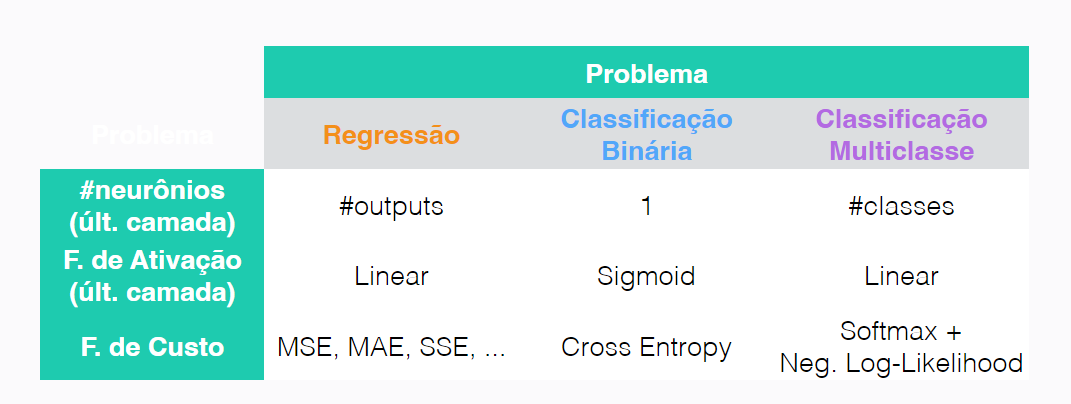

# Implementação Redes Neurais Profundas


Redes Neurais Profundas, também conhecidas como redes neurais profundas, são um tipo de arquitetura de rede neural artificial que consiste em várias camadas de neurônios artificiais, sendo caracterizadas por terem mais de uma camada oculta entre a camada de entrada e a camada de saída. Essas redes são capazes de aprender representações complexas e abstratas dos dados através do processamento em múltiplas camadas.

O termo "profundo" refere-se ao número de camadas intermediárias na rede neural, que pode variar de algumas dezenas a centenas ou até mesmo milhares de camadas. Essas redes são capazes de aprender características de alto nível dos dados, como padrões e relações não lineares, tornando-as especialmente poderosas em tarefas de reconhecimento de padrões, classificação, regressão, processamento de linguagem natural, visão computacional e muitas outras áreas de aprendizado de máquina e inteligência artificial.

Redes neurais profundas são capazes de aprender representações hierárquicas dos dados, onde cada camada da rede extrai características cada vez mais abstratas dos dados de entrada. Isso permite que as redes aprendam a representar dados complexos de maneira mais eficiente e eficaz do que redes neurais rasas, que têm apenas uma ou duas camadas ocultas.

In [1]:
import numpy as np
import _pickle as pkl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Funções de Ativação

In [2]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

def sigmoid(x, derivative=False):
	if derivative:
		y = sigmoid(x)
		return y *(1-y)
	return 1.0 / (1.0 + np.exp(-x))

def tanh(x, derivative=False):
  if derivative:
    y = tanh(x)
    return 1 - y**2
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def leaky_relu(x, derivative=False):
  alpha = 0.1
  if derivative:
    return np.where(x <= 0, alpha, 1)
  return np.where(x <= 0, alpha*x, x)

def elu(x, derivative=False):
  alpha = 0.1
  if derivative:
    return np.where(x <= 0, y + alpha, 1)
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def relu(x, derivative=False):
    if derivative:
        x = np.where(x <=0, 0, 1)
    return np.maximum(0, x)

def softmax(x, y_oh=None, derivative=False):
    if derivative:
      y_pred = softmax(x)
      k = np.nonzero(y_pred * y_oh)
      pk = y_pred[k]
      y_pred[k] = pk * (1.0 - pk)
      return y_pred

    exp = np.exp(x)

    return exp / np.sum(exp, axis=1, keepdims=True)



## Funções de Custo

### Regressão

In [3]:
def mae(y, y_pred, derivative=False):
  if derivative:
    return np.where(y_pred > y, 1, -1)/ y.shape[0]
  return np.mean(np.abs(y - y_pred))

def mse(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred) / y.shape[0]
    return 0.5 * np.mean((y-y_pred)**2)

### Classificação Binária

In [4]:
def binary_cross_entropy(y, y_pred, derivative=False):
    if derivative:
      return -(y - y_pred) / (y_pred * (1 - y_pred) * y.shape[0])
    return -np.mean(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))

def sigmoid_cross_entropy(y, y_pred, derivative=False):
    y_sigmoid = sigmoid(y_pred)
    if derivative:
        return -(y - y_sigmoid) / y.shape[0]
    return -np.mean(y*np.log(y_sigmoid) + (1 - y)* np.log(1- y_sigmoid))

### Multiclasse

In [5]:
def neg_log_likelihood(y_oh, y_pred, derivative=False):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    if derivative:
      y_pred[k] = (-1.0 / pk)
      return y_pred
    return np.mean(-np.log(pk))

def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    if derivative:
      k = np.nonzero(y_pred * y_oh)
      dlog = neg_log_likelihood(y_oh, y_softmax, derivative=True)
      dsoftmax = softmax(y_pred, y_oh, derivative=True)
      y_softmax[k] = dlog[k] * dsoftmax[k]

      return y_softmax / y_softmax.shape[0]

    return neg_log_likelihood(y_oh, y_softmax)

## Implementação

In [35]:
class Layer():
  def __init__(self, input_dim, output_dim, weights_initializer=random_normal, biases_intializer=ones,activation=linear, dropout_prob=0.0, reg_func=l2_regularization, reg_strength=0.0, batch_norm=False, bn_decay=0.9, is_trainable=True):
    self.input = None
    self.weights = weights_initializer(output_dim, input_dim)
    self.biases = biases_intializer(1, output_dim)
    self.activation = activation
    self.reg_func = reg_func
    self.reg_strength = reg_strength
    self.batch_norm = batch_norm
    self.bn_decay = bn_decay
    self.gamma, self.beta = ones(1, output_dim), zeros(1, output_dim)
    self.is_trainable = is_trainable

    self._activ_inp, self._activ_out = None, None
    self._dweights, self._dbiases, self._prev_dweights  = None, None, 0.0
    self.dropout_prob = dropout_prob
    self._dropout_mask = None
    self._dgamma, self._dbeta = None, None
    self._pop_mean, self._pop_var = zeros(1, output_dim), zeros(1, output_dim)
    self._bn_cache = None

class NeuralNetwork():
  def __init__(self, cost_func=mse, learning_rate=1e-3, lr_decay_method=none_decay, lr_decay_rate=0.0, lr_decay_steps=1, momentum=0.0, patience=np.inf):
      self.layers = []
      self.cost_func = cost_func
      self.learning_rate = self.lr_initial = learning_rate
      self.lr_decay_method = lr_decay_method
      self.lr_decay_rate = lr_decay_rate
      self.lr_decay_steps = lr_decay_steps
      self.momentum = momentum
      self.patience, self.waiting = patience, 0
      self._best_model, self._best_loss = self.layers, np.inf


  def fit(self, x_train, y_train, x_val=None, y_val=None, epochs=100, verbose=10, batch_gen=batch_sequential, batch_size=None):
      x_val, y_val = (x_train, y_train) if(x_val is None or y_val is None) else (x_val, y_val)

      for epoch in range(epochs + 1):
          self.learning_rate = self.lr_decay_method(self.lr_initial, epoch, self.lr_decay_rate, self.lr_decay_steps)
          for x_batch, y_batch in batch_gen(x_train, y_train, batch_size):
            y_pred = self.__feedforward(x_batch)
            self.__backprop(y_batch, y_pred)
          loss_val = self.cost_func(y_val, self.predict(x_val))

          if loss_val < self._best_loss:
            self._best_model, self._best_loss = self.layers, loss_val
            self.waiting = 0
          else:
            print("not improving! [{}] current: {} best: {}".format(self.waiting, self.loss, self._best_loss))
            self.waiting += 1

            if self.waiting >= self.patience:
              self.layers = self._best_model
              print("early stopping at epoch", epoch)
              return

          if epoch % verbose == 0:
              loss_train = self.cost_func(y_train, self.predict(x_train))
              loss_reg = (1.0 / y_train.shape[0]) * np.sum([(layer.reg_strength * layer.reg_func(layer.weights)) for layer in self.layers])
              print("epoch: {0:=4}/{1} loss_train: {2:.8f}".format(epoch, epochs, loss_train))

  def predict(self, x):
      return self.__feedforward(x, is_training=False)

  def save(self, file_path):
      pkl.dump(self, open(file_path, 'wb'), -1)

  def load(file_path):
      return pkl.load(open(file_path, 'rb'))

  def __feedforward(self, x, is_training=True):
      self.layers[0].input = x
      for current_layer, next_layer in zip(self.layers, self.layers[1:] + [Layer(0, 0)]):
          y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.biases
          y = batchnorm_forward(current_layer, y, is_training) if current_layer.batch_norm else y


          current_layer._dropout_mask = np.random.binomial(1,  1.0 - current_layer.dropout_prob, y.shape) / (1.0 - current_layer.dropout_prob)
          current_layer._activ_inp = y
          current_layer._activ_out = current_layer.activation(y) * (current_layer._dropout_mask if is_training else 1.0)
          next_layer.input = current_layer._activ_out
      return self.layers[-1]._activ_out

  def __backprop(self, y, y_pred):
      last_delta = self.cost_func(y, y_pred, derivative=True)

      for layer in reversed(self.layers):
          dactivation = layer.activation(layer._activ_inp, derivative=True) * last_delta * layer._dropout_mask
          dactivation = batchnorm_backward(layer, dactivation) if layer.batch_norm else dactivation

          last_delta = np.dot(dactivation, layer.weights)
          layer._dweights = np.dot(dactivation.T, layer.input)
          layer._dbiases = 1.0 * dactivation.sum(axis=0, keepdims=True)

      for layer in reversed(self.layers):
          if layer.is_trainable:
            layer._dweights = layer._dweights + (1.0 / y.shape[0]) * layer.reg_strength * layer.reg_func(layer.weights, derivative=True)
            layer._prev_dweights = -self.learning_rate * layer._dweights + self.momentum*layer._prev_dweights
            layer.weights = layer.weights + layer._prev_dweights
            layer.biases = layer.biases - self.learning_rate * layer._dbiases
            if layer.batch_norm:
                layer.gamma = layer.gama - self.learning_rate * layer._dgamma
                layer.beta = layer.beta - self.learning_rate * layer._dbeta

### Avaliação com Exemplo

#### Primeiro Exemplo

In [31]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([[0.35]])

w2 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([[0.60]])

# inicializando a rede

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func=mse, learning_rate=0.5, momentum=0.9)
nn.layers.append(Layer(input_dim=input_dim, output_dim=2, activation=sigmoid))
nn.layers.append(Layer(input_dim=2, output_dim=output_dim, activation=sigmoid))

nn.layers[0].weights = w1
nn.layers[0].biases = b1

nn.layers[1].weights = w2
nn.layers[1].biases = b2

nn.fit(x, y, epochs=0, verbose=1)

for layer in nn.layers:
  print(layer.weights)

epoch:    0/0 loss_train: 0.14023572
[[0.14978072 0.19956143]
 [0.24975114 0.29950229]]
[[0.35891648 0.40866619]
 [0.51130127 0.56137012]]


#### Segundo Exemplo

In [32]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])

D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones((1,3))

w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones((1,3))

w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones((1,3))

## Rede Neural

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=0.01, momentum=0.9)

nn.layers.append(Layer(input_dim=D_in, output_dim=3, activation=relu))
nn.layers.append(Layer(input_dim=3, output_dim=3, activation=sigmoid))
nn.layers.append(Layer(input_dim=3, output_dim=D_out, activation=linear))


for i, w, b in zip(range(3), [w1, w2, w3], [b1, b2, b3]):
  nn.layers[i].weights = w
  nn.layers[i].biases = b

nn.fit(x, y, epochs=300, verbose=30)

for layer in nn.layers:
  print(layer.weights)

epoch:    0/300 loss_train: 1.14054966
epoch:   30/300 loss_train: 0.06032825
epoch:   60/300 loss_train: 0.02507178
epoch:   90/300 loss_train: 0.01806993
epoch:  120/300 loss_train: 0.01439346
epoch:  150/300 loss_train: 0.01199464
epoch:  180/300 loss_train: 0.01029150
epoch:  210/300 loss_train: 0.00901666
epoch:  240/300 loss_train: 0.00802537
epoch:  270/300 loss_train: 0.00723191
epoch:  300/300 loss_train: 0.00658211
[[0.10300136 0.20600273 0.32100955]
 [0.3033506  0.20670119 0.72345417]
 [0.40548306 0.31096612 0.93838144]]
[[0.2370889  0.34585546 0.55106473]
 [0.33366107 0.54163453 0.74629795]
 [0.63175301 0.43927847 0.84366217]]
[[ 1.3486648   1.69861958  2.11242229]
 [-0.26261932  0.11492183 -0.3912727 ]
 [-0.18604548 -0.51354142  0.17885041]]


# Inicialização de Pesos

## Zeros
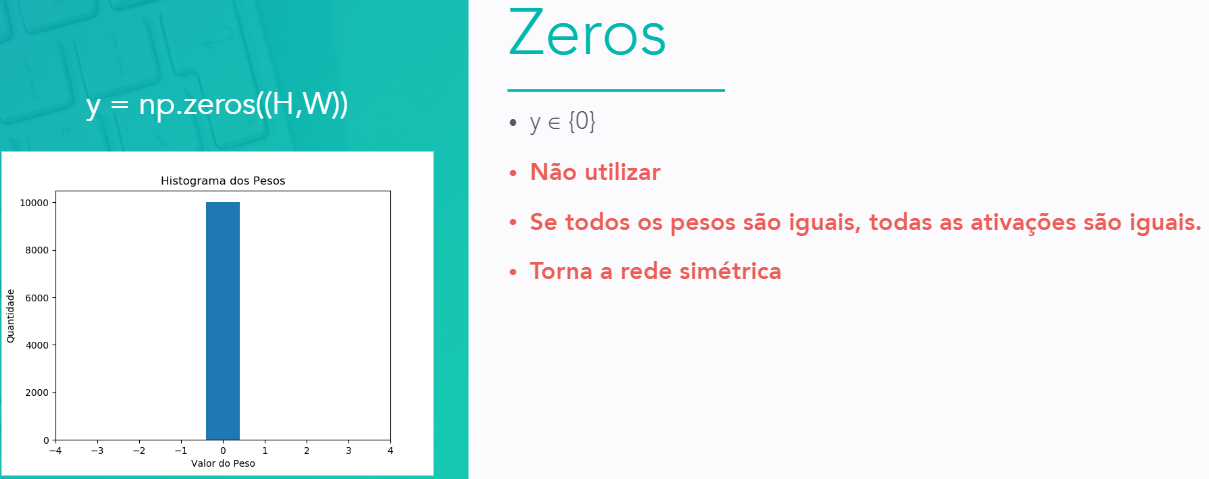

In [6]:
def zeros(rows, cols):
	return np.zeros((rows, cols))

## Ones
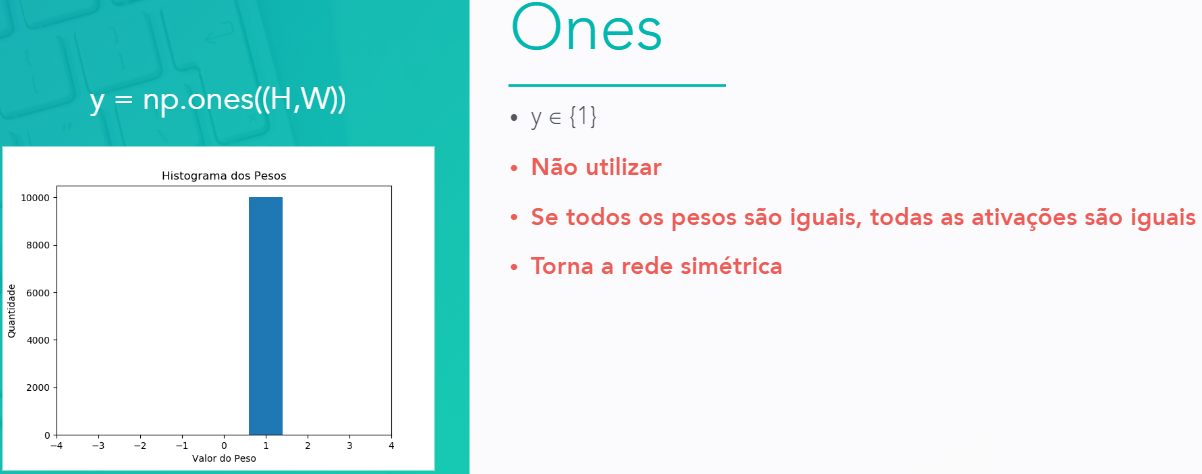

In [7]:
def ones(rows, cols):
	return np.ones((rows, cols))

## Uniforme Aleatória
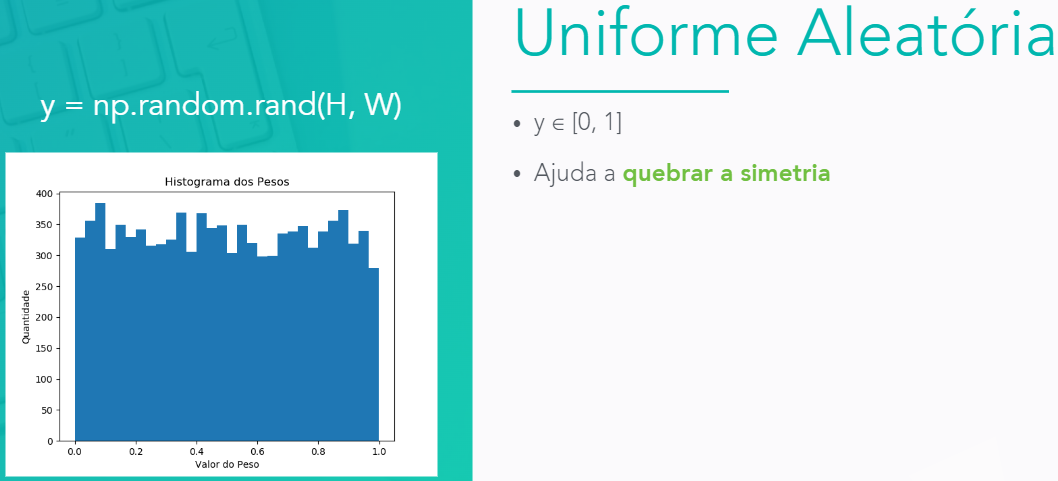

In [8]:
def random_normal(rows, cols):
	return np.random.randn(rows, cols)

## Normal Aleatória

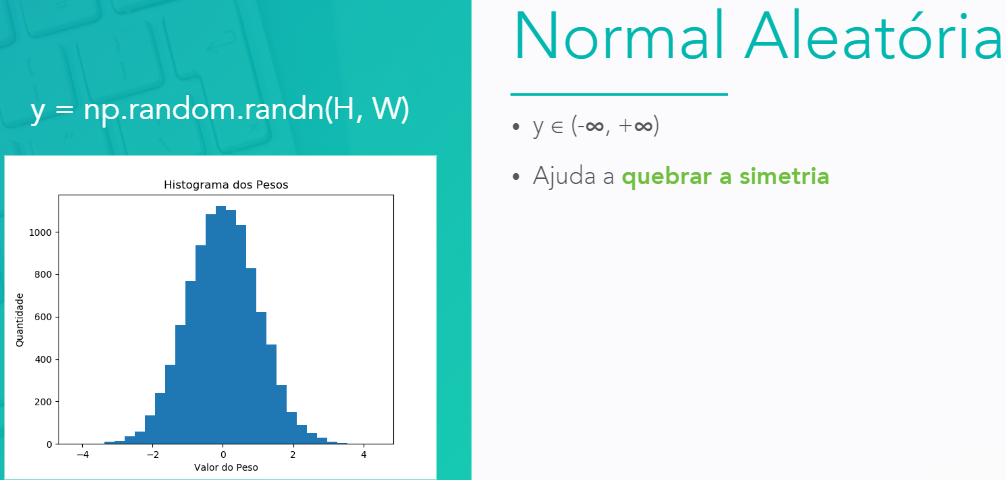

In [9]:
def random_uniform(rows, cols):
	return np.random.rand(rows, cols)

## Glorot Uniforme

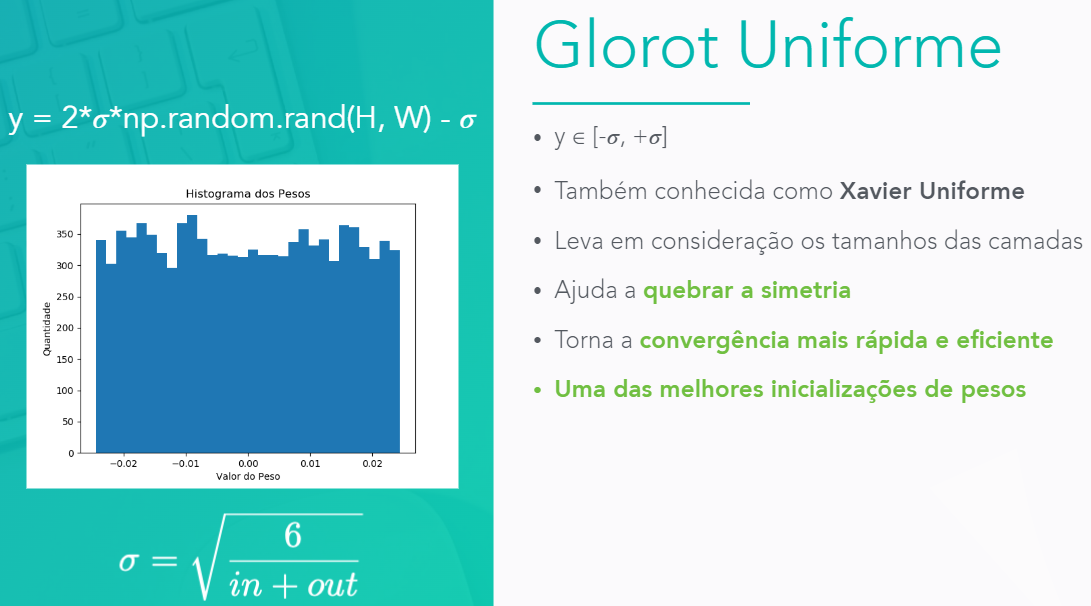

In [10]:
def glorot_uniform(rows, cols):
	std_dev = np.sqrt(2.0 / (rows + cols))
	return std_dev*np.random.randn(rows, cols)

## Glorot Normal

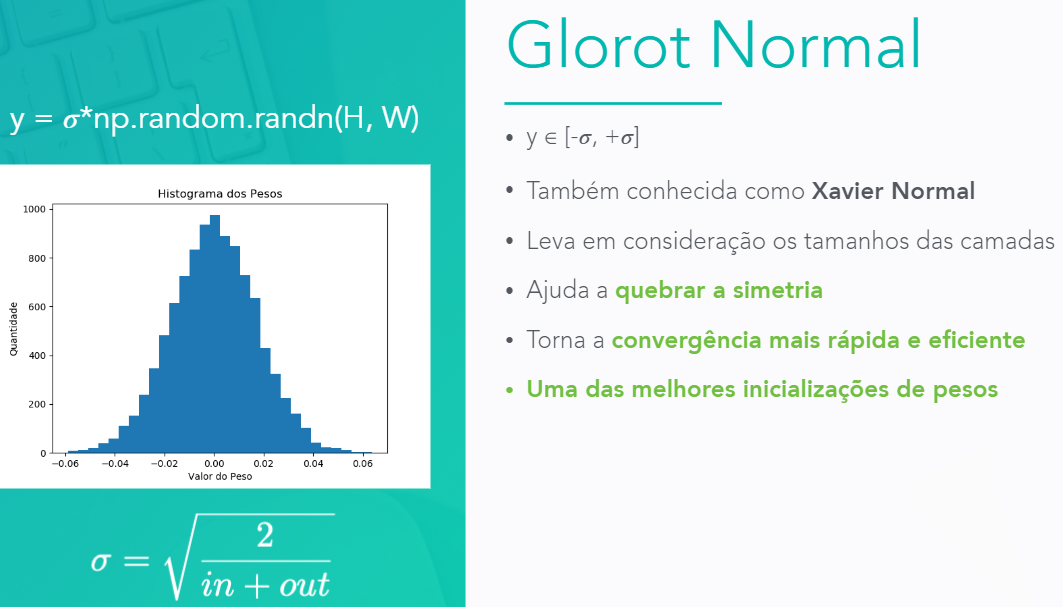

In [11]:
def glorot_normal(rows, cols):
	limit = np.sqrt(6.0 / (rows + cols))
	return 2*limit*np.random.rand(rows, cols) - limit

# Learning Rate Decay

O processo de Learning Rate Decay, ou decaimento da taxa de aprendizagem, é uma técnica utilizada durante o treinamento de redes neurais para ajustar dinamicamente a taxa de aprendizagem ao longo do tempo. A ideia por trás do decaimento da taxa de aprendizagem é reduzir gradualmente a taxa de aprendizagem à medida que o treinamento avança, permitindo que o modelo faça ajustes menores nos pesos à medida que se aproxima da convergência.

In [12]:
def none_decay(learning_rate, epoch, decay_rate, decay_step=1):
	return learning_rate

In [13]:
def time_based_decay(learning_rate, epoch, decay_rate, decay_step=1):
  return 1.0 / 1 + (decay_rate * epoch)

In [14]:
def exponential_decay(learning_rate, epoch, decay_rate, decay_step=1):
  return learning_rate * (decay_rate**epoch)

In [15]:
def staircase_decay(learning_rate, epoch, decay_rate, decay_step=1):
  return learning_rate * (decay_rate**(epoch//decay_step))